In [3]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter

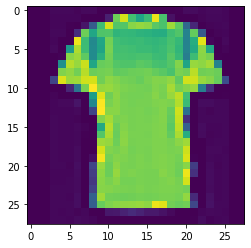

In [4]:
data_path='data'
#load the actual hackthon data (fashion-mnist)
images=np.load(data_path+'/images.npy')
labels=np.load(data_path+'/labels.npy')
#you can visualize it
import matplotlib.pyplot as plt
plt.imshow(images[1])

In [6]:
#your submission

# Functions 'encode' and 'decode' are dummy.
def encode(image):
      

# Open the picture prepared in advance
        
    imgmat = np.array(list(image.getdata(band=0)), float)
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)/255
        
#preprocessing - Dimensionality reduction
     
        

    image = image.reshape((28, 28))
    pca = PCA(n_components=8)
    reduced_image = pca.fit_transform(image)
    reduced_image = reduced_image.reshape((8, 8))    
        
        
        
        
# Convert the raw pixel values to probability amplitudes
    def amplitude_encode(img_data):
    
# Calculate the RMS value
        rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
# Create normalized image
        image_norm = []
        for arr in img_data:
            for ele in arr:
                image_norm.append(ele / rms)
        
# Return the normalized image as a numpy array
        return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
    image_norm_h = amplitude_encode(reduced_image)

# Vertical: Transpose of Original image
    image_norm_v = amplitude_encode(reduced_image.T)  
    
    
    
# Initialize some global variable for number of qubits
    data_qb = 6
    anc_qb = 1
    total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
    D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
    
# Create the circuit for horizontal scan
    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(image_norm_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)
    display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(image_norm_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)
    

# Combine both circuits into a single list
    circ_list = [qc_h, qc_v]
        
        
    
    return qc_h

def decode(histogram):
    
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)
    
    
    edge_scan_h = np.abs(np.array([1 if threshold(histogram.get(2*i+1).real) else 0 for i in range(2**6)])).reshape(8, 8)
    
    # Return matrix after retrieval (take 8x8 return back 28x28) @Abhihek or Rishabh
    
    image = pca.inverse_transform(edge_scan_h)
    image= original_image.reshape((28, 28))
   
    return matrix

def run_part1(image):
    #encode image into a circuit
    circuit=encode(image)

    #simulate circuit
    histogram=simulate(circuit)

    #reconstruct the image
    image_re=decode(histogram)

    return circuit,image_re

def run_part2(image):
    # load the quantum classifier circuit
     # a. Use encode(image) to convert the image into a quantum circuit
    qr = qiskit.QuantumRegister(8) # 8 qubits to represent the 8x8 image
    circuit = qiskit.QuantumCircuit(qr)
    # Add gates to the circuit to implement the classifier logic
    circuit.h(qr[0])
    circuit.cx(qr[0], qr[1])
    circuit.cx(qr[1], qr[2])

    # Save the circuit to a .pickle file
    with open("quantum_classifier.pickle", "wb") as file:
        pickle.dump(circuit, file)


    
    en_image = encode(image)
    
    # b. Append the circuit with the classifier circuit loaded from the .pickle file
    with open("quantum_classifier.pickle", "rb") as file:
        classifier_circuit = pickle.load(file)
        
    #circuit = encoded_image + classifier_circuit
    circuit = en_image.compose(classifier_circuit)
    
    # c. Simulate the circuit (encoded_image+classifier_circuit) and get a histogram
    backend = qiskit.BasicAer.get_backend("qasm_simulator")
    result = qiskit.execute(circuit, backend, shots=1024).result()
    ob1 = assemble(circuit)
    res = backend.run(ob1).result()
    
    #simulate circuit
    histogram=simulate(qc)
        
    #convert histogram to category
    label=histogram_to_category(histogram)
    
    #thresholding the label, any way you want
    if label>0.5:
        label=1
    else:
        label=0
        
    return circuit,label




In [7]:
#how we grade your submission

score=0
gatecount=0
n=len(images)

for i in range(n):
    #run part 2
    circuit,label=run_part2(images[i])
    

    
    #count the gate used in the circuit for score calculation
    gatecount+=count_gates(circuit)[2]
    
    #check label
    if label==labels[i]:
        score+=1
#score
score=score/n
gatecount=gatecount/n

print(score*(0.999**gatecount))

AttributeError: 'numpy.ndarray' object has no attribute 'getdata'